In [1]:
# CELL 1
# VERIFIED AS WORKING
# prepopulated
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# CELL 2
# VERIFIED AS WORKING
# prepopulated
import numpy as np
import pandas as pd

In [3]:
# CELL 3
# VERIFIED AS WORKING
# prepopulated
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# CELL 4
# VERIFIED AS WORKING
# prepopulated
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# CELL 5
# VERIFIED AS WORKING
# prepopulated
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# CELL 6
# VERIFIED AS WORKING
# prepopulated
# reflect an existing database into a new model
# - Declare a Base using `automap_base()`
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [7]:
# CELL 7
# VERIFIED AS WORKING
# We can view all of the classes that automap found
Base.classes.keys()

# show columns from measurement table
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# CELL 8
# VERIFIED AS WORKING
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# CELL 9
# VERIFIED AS WORKING
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Avg. Precipitation (inches)')

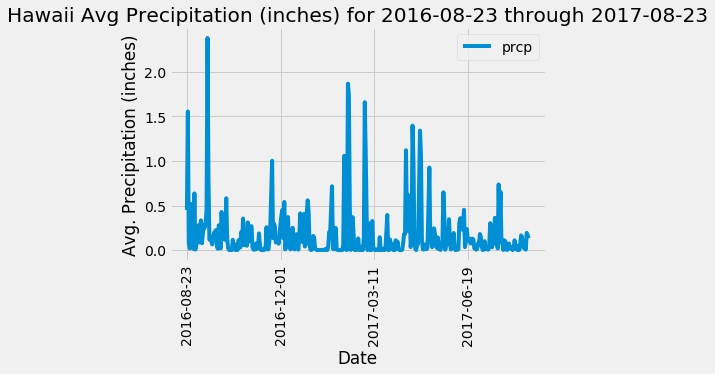

In [10]:
# CELL 10.01
# VERIFIED AS WORKING
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results

prcp_score = session.query(Measurement.prcp, \
                           Measurement.date).\
                            filter(Measurement.date >='2016-08-23').\
                            order_by(Measurement.date).all()

prcp_score_df = pd.DataFrame(prcp_score)

# Group by date and calculate mean precipitation
grouped_prcp_df = prcp_score_df.groupby(['date']).mean()
grouped_prcp_df

x_axis = grouped_prcp_df.index
y_axis = grouped_prcp_df["prcp"].values

grouped_prcp_df.plot()

# tickmark rotation sourced from https://stackoverflow.com/questions/36481952/matplotlib-ticks-overlapping
plt.xticks(rotation=90)

plt.title("Hawaii Avg Precipitation (inches) for 2016-08-23 through 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Avg. Precipitation (inches)")

In [11]:
# CELL 11
# NEED TO CONVERT FROM DATETIME TO STRING
# Calculate the date 1 year ago from the last data point in the database
# Modeled after class activity 10.2.9
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(last_date)

#.all = list of tuples
#.first = first tuple
#.scalar = returns data itself if 1 observation only

# conert last_date from result object to datetime object
last_date = pd.to_datetime(last_date)
print(type(last_date))

#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
year_ago = last_date - dt.timedelta(days=365)
year_ago

# DEBUG!! Does not convert timestamp to string
# Convert timestamp to string of date (yyyy-mm-dd)
# Converstion of datatype from datetime to string
# sourced from https://stackoverflow.com/questions/30132282/datetime-to-string-with-series-in-python-pandas
# also sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
# also sourced from https://stackoverflow.com/questions/17245612/formatting-time-as-d-m-y
year_ago.strftime('%Y-%m-%d')
year_ago


2017-08-23
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2016-08-23 00:00:00')

In [12]:
# CELL 12
# VERIFIED AS WORKING
# Perform a query to retrieve the data and precipitation scores (date, prcp)
# Limit data for only last year of data
# date and precipitation scores
# tobs  = temperature observation

prcp_score = session.query(Measurement.prcp, \
                           Measurement.date).\
                            filter(Measurement.date >='2016-08-23').\
                            order_by(Measurement.date).all()
#print(prcp_score)
# prints list of tuples

prcp_dict = {}
for element in prcp_score:
        key = element[1]
        value = element[0]
        prcp_dict.update({key: value})
#print(prcp_dict)
print("prcp_score was retrieved")
#COLUMNS from db
#{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x0000022D4A69E088>, 
# 'station': 'USC00519397', 'prcp': 0.08, 'tobs': 65.0, 'id': 1, 'date': '2010-01-01'}

prcp_score was retrieved


In [13]:
# CELL 13
# VERIFIED AS WORKING
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_score = pd.DataFrame(prcp_score)
prcp_score

# Sort the dataframe by date
prcp_score.sort_values(by=['date'], inplace = True)
prcp_score

# Set Index to Date Column
prcp_score.set_index("date", inplace = True)
prcp_score

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Avg. Precipitation (inches)')

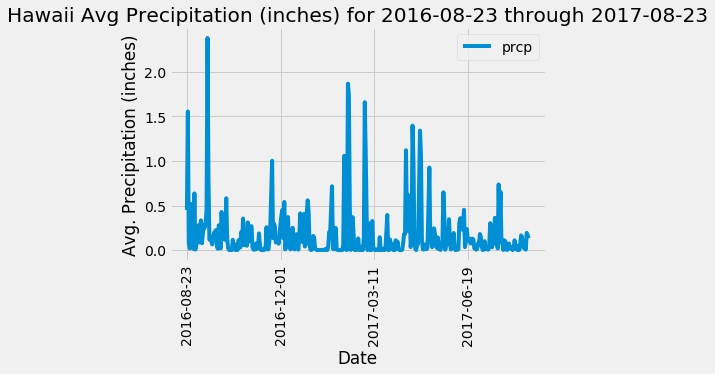

In [14]:
# CELL 14
# VERIFIED AS WORKING
# Use Pandas Plotting with Matplotlib to plot the data

# Group by date and calculate mean precipitation
grouped_prcp_score = prcp_score.groupby(['date']).mean()
grouped_prcp_score

x_axis = grouped_prcp_score.index
y_axis = grouped_prcp_score["prcp"].values

grouped_prcp_score.plot()
#plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# tick marks overlap each other
# bar chart output does not match solution key
# restrict number of ticks
# sourced from https://stackoverflow.com/questions/6682784/reducing-number-of-plot-ticks
#plt.locator_params(axis='x', nbins=12)

#last_year.plot(kind='bar')
# tickmark rotation sourced from https://stackoverflow.com/questions/36481952/matplotlib-ticks-overlapping
plt.xticks(rotation=90)

plt.title("Hawaii Avg Precipitation (inches) for 2016-08-23 through 2017-08-23")
plt.xlabel("Date")
plt.ylabel("Avg. Precipitation (inches)")

In [15]:
# CELL 15
# original data but only for last year
# VERIFIED AS WORKING
# QUESTION:  Should this be calculated on prcp_score (multiple stations) - or grouped_prcp_score (avg prcp by date)?
# Use Pandas to calcualte the summary statistics for the precipitation data
grouped_prcp_score.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [16]:
# CELL 16
# VERIFIED AS WORKING
# Design a query to show how many stations are available in this dataset?
# Retrieve column names from table measurement
first_row = session.query(Station).first()
print(first_row.__dict__)

# COLUMN NAMES:
# _sa_instance_state
# latitude
# station
# slevation
# longitude
# id
# name


# DEBUG!! how to get count = 9??
station_name = session.query(func.count(Station.name)).group_by(Station.name).all()
station_name

# converts tuple to array of list
station_list = np.ravel(station_name)
station_list

station_count = 0
for item in station_list:
    station_count = station_count + item
print(f"Station Count:  {station_count}")

station_name_id = session.query(Station.id, Station.name).group_by(Station.name).order_by(Station.id).all()
station_name_id

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001F83807E088>, 'longitude': -157.8168, 'id': 1, 'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US', 'latitude': 21.2716, 'elevation': 3.0}
Station Count:  9


[(1, 'WAIKIKI 717.2, HI US'),
 (2, 'KANEOHE 838.1, HI US'),
 (3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'PEARL CITY, HI US'),
 (5, 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'WAIHEE 837.5, HI US'),
 (8, 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'MANOA LYON ARBO 785.2, HI US')]

In [17]:
# CELL 17.01 
# List of stations and frequency of weather data
# Most active station = 'USC00519281'
# VERIFIED AS WORKING
station_count_data_list = session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_count_data_list)
most_active_station = station_count_data_list[0][1]
print(f"Most Active Station is:  {most_active_station}")

[(2772, 'USC00519281'), (2724, 'USC00519397'), (2709, 'USC00513117'), (2669, 'USC00519523'), (2612, 'USC00516128'), (2202, 'USC00514830'), (1979, 'USC00511918'), (1372, 'USC00517948'), (511, 'USC00518838')]
Most Active Station is:  USC00519281


In [18]:
# CELL 18
# VERIFIED AS WORKING
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# METHODOLOGY
# join tables
# session.query(func.max)
# .filter Station.id == x
station_1_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
#.group_by(Station.name)
print(station_1_max)

station_1_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
#.group_by(Station.name)
print(station_1_min)

# DEBUG!! -- how to set decimal places for a result object
station_1_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
#.group_by(Station.name)
print(station_1_avg)

station_3_obs = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).first()
station_3_obs

[(85.0,)]
[(54.0,)]
[(71.66378066378067,)]


(85.0, 54.0, 71.66378066378067)

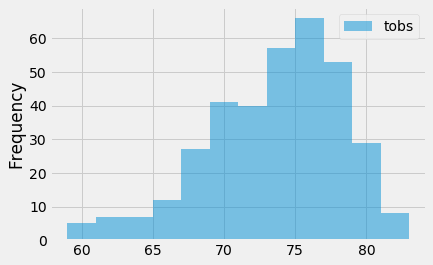

In [19]:
# CELL 19
# VERIFIED AS WORKING
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

    
#MIN:  2010-01-01
#MAX:  2017-08-23

# DEBUG!! -- why is most_frequent_last_12 an empty list
most_frequent_last_12 = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').filter(Measurement.station == most_active_station).all()
#most_frequent_last_12

df = pd.DataFrame(most_frequent_last_12)

df.plot.hist(bins=12, alpha=0.5)

## Bonus Challenge Assignment

In [20]:
# CELL 20
# VERIFIED AS WORKING
# prepopulated
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# CELL 21
# VERIFIED AS WORKING
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# QUESTION: for those same dates???
calc_temps_output = calc_temps('2017-02-28', '2017-03-05')
calc_temps_output

[(64.0, 72.02777777777777, 78.0)]

<BarContainer object of 3 artists>

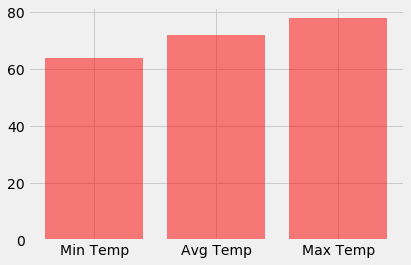

In [22]:
# CELL 22
# NEED TO REDO CHART
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (year)

# DEBUG!! -- how to unpack tuple?
x_axis = ["Min Temp", "Avg Temp", "Max Temp"]
y_axis = list(np.ravel(calc_temps_output))
y_axis

# To unpack tuples of y_axis, sourced from https://stackoverflow.com/questions/22799300/how-to-unpack-a-series-of-tuples-in-pandas
# Does not work
#y_axis.apply(pd.Series)
#new_y_axis = y_axis.columns=['Min','Avg', 'Max']
y_axis

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

# QUESTION:  How to get xlabels?
#plt.title("Hawaii Min, Avg, and Max Temps")
#plt.xlabel("TBD")
#plt.ylabel("Temperature")


In [23]:
# CELL 23
# VERIFIED AS WORKING
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation?

# QUESTION:  Why is group_by not color coded?

start_date = '2017-02-28'
end_date = '2017-03-05'

# Query
total_rainfall = session.query(func.sum(Measurement.prcp), Station.station, Measurement.id, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        group_by(Station.name).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        order_by(func.sum(Measurement.prcp).desc()).all()
total_rainfall


[(4.720000000000001,
  'USC00519281',
  14797,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (4.45, 'USC00513117', 5280, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (4.07,
  'USC00516128',
  19385,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (2.98, 'USC00517948', 8935, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (2.7399999999999998,
  'USC00519397',
  2553,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 (2.32,
  'USC00519523',
  12026,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (1.1600000000000001,
  'USC00514830',
  7490,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0)]

In [24]:
# CELL 24
# VERIFIED AS WORKING
# prepopulated
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
# QUESTION: What does this function do?
# QUESTION:  WHAT ARE THE DAILY NORMALS
# 

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """

    # QUESTION: What does *sel do?
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [46]:
# CELL 25
# NEED BETTER INSTRUCTIONS
# How to push tuple into list
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
start_date = '2017-02-28'
end_date = '2017-03-05'

# Changed to date_range from list of dates
vacation_dates = pd.date_range(start=start_date, end=end_date)
vacation_days = vacation_dates.strftime("%m-%d")
# replace vacation_tobs with normals
normals = []
for day in vacation_days:
    
    normals.append(*daily_normals(day))

normals    
#vacation_days
# ALT METHOD
# Set the start and end date of the trip


# QUESTION:  HOW TO CREATE RANGE OF DATES
# Use the start and end date to create a range of dates

# Strip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [49]:
# CELL 26
# ADD vacation_days as column and reset as index
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


vacation_weather_df = pd.DataFrame(normals, columns=["min", "avg", "max"])
vacation_weather_df["date"] = vacation_dates
vacation_weather_df.set_index("date", inplace = True)
vacation_weather_df



,min,avg,max
date,,,
2017-02-28,65.0,70.655172,80.0
2017-03-01,64.0,70.032787,76.0
2017-03-02,61.0,70.366667,78.0
2017-03-03,60.0,70.068966,78.0
2017-03-04,57.0,69.272727,77.0
2017-03-05,60.0,67.890909,76.0


In [26]:
# CELL 26 b - troubleshooting
# IGNORE THIS BLOCK OF CODE
# 
# Appending a df sourced from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html

# Create dataframe columns
vaca_weather_df = pd.DataFrame([["", "", "", ""]], columns=["min", 'avg', 'max', 'date'])
# QUESTION:  How to append a df?
# Sourced from ...

# DEBUG!! -- rows 2-6 are out of range
# DEBUG!! -- record[0][0] should be 65.0, but 60 is being assigned
# DEBUG!! -- REWRITE AS LOOP for j in range(0, 5) = inner loop. for i in range 0,2 = outer loop.
vaca_weather_df['min'][0] = vacation_weather_df[0][0][0]
vaca_weather_df['avg'][0] = vacation_weather_df[0][0][1]
vaca_weather_df['max'][0] = vacation_weather_df[0][0][2]
vaca_weather_df['date'][0] = vacation_days[0]

# DEBUG!! -- why not printing out 2nd df row
# QUESTION:  why need 3 indexes [a][b][c]??? -- ANSWER - List, tuple, element in tuple
# DEBUG!! -- so why doesn't [0][1][0] not return first element of 2nd tuple???
vaca_weather_df['min'][1] = vacation_weather_df[0][1][0]
vaca_weather_df['avg'][1] = vacation_weather_df[0][1][1]
vaca_weather_df['max'][1] = vacation_weather_df[0][1][2]
vaca_weather_df['date'][1] = vacation_days[1]

# DEBUG!! NEED TO TEST
# MESSY AND INACCURATE ASSIGNMENTS
#for i in range(0,2):
#    for j in range(0, 5):
#        vaca_weather_df[i, j] = vacation_weather_df[0][j][i]
#
print(vaca_weather_df)

for record in normals:
    print(record)

  min      avg max   date
0  65  70.6552  80  02-28
[(65.0, 70.65517241379311, 80.0)]
[(64.0, 70.0327868852459, 76.0)]
[(61.0, 70.36666666666666, 78.0)]
[(60.0, 70.06896551724138, 78.0)]
[(57.0, 69.27272727272727, 77.0)]
[(60.0, 67.89090909090909, 76.0)]


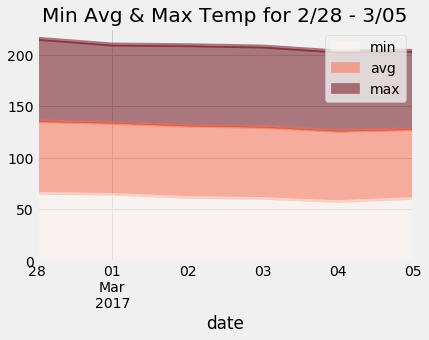

In [58]:
# CELL 27
# Plot the daily normals as an area plot with `stacked=False`
# QUESTION: What is an area plot?
# sample code sourced from https://stackoverflow.com/questions/34421434/pandas-dataframe-area-plot-stacked-false-not-working
#df.plot(kind='area', stacked='false', alpha=0.5, colormap='Reds', title='Min Avg & Max Temp for 2/28 - 3/05')

# DEBUG!! -- why is min correctly showing around ~60, but avg is around 145 and max is > 200???
# ANSWER - the chart is adding avg line = min + avg.  max line = min + avg + max.
# Place legend topright
vacation_weather_df.plot(kind='area', stacked='false', alpha=0.5, colormap='Reds', title='Min Avg & Max Temp for 2/28 - 3/05')
[ax.legend(loc=1) for ax in plt.gcf().axes]

#vacation_weather_df.normalizedDataFrame.plot.area(stacked='false')